In [38]:
import gym
import numpy as np

from my_envs.mujoco import *
from my_envs.base.command_generator import command_generator
from matplotlib.pylab import plt
from evaluate.plot_results import *
import pandas as pd
from utils.Logger import  IO
from utils.fir_filter import fir_filter

In [63]:
rlt = IO('RewardDuty/fitness5_param.pkl').read_pickle()

In [64]:
(rewards, commands, v_e) = rlt
ve_df = pd.DataFrame(v_e)

ve_df.to_csv('RewardDuty/ve.csv')

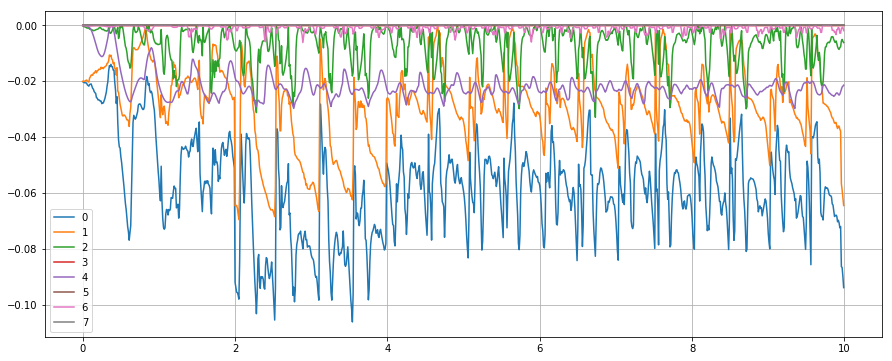

In [65]:
t = np.arange(0,10,0.01)

plt.figure(figsize=(15,6))
#plt.plot(t , v_e[:,0], 'r-')
#plt.plot(t , v_e[:,1], 'g-')
#plt.plot(t , v_e[:,3],  label='wx')
#plt.plot(t , v_e[:,4],  label='wy')
#plt.plot(t , v_e[:,5],  label='wz')


for i in range(rewards.shape[1]):
    plt.plot(t , rewards[:,i], label=str(i))
    
plt.legend()
plt.grid()

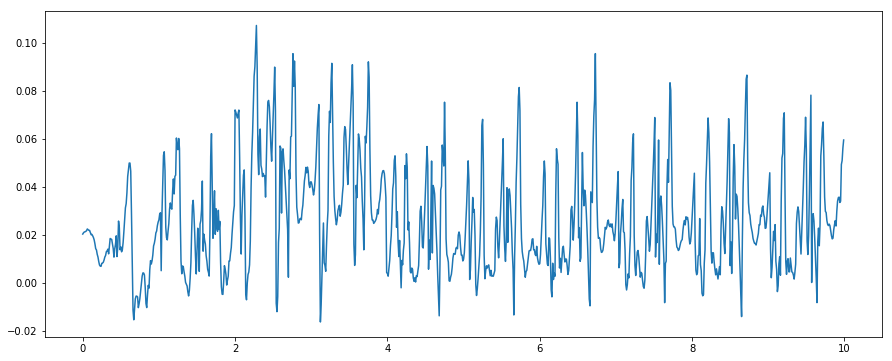

In [59]:
plt.figure(figsize=(15,6))
plt.plot(t , rewards[:,0],  label='wz')

In [46]:
env = gym.make('CellrobotEnvCPG-v0')  # MyAnt-v2 Swimmer2-v2  SpaceInvaders-v0 CellrobotEnv-v0

#env = gym.wrappers.Monitor(env, 'tmp/tmp.mp4', force=True)

print('state: ', env.observation_space)
print('action: ', env.action_space)
q_dim = 1

#command =  command_generator(10000, 0.01, 2, vx_range=(-0.2, 0.2), vy_range = (0,0), wyaw_range = (0,0))
reward_fun = 1
obs = env.reset()
print('test')

 

max_step = 1000

v_e = []
c_command = []
xyz = []

rewards = []
#action = np.ones(39) * (1)

# sim_state.qpos[:] = qpos_int

# sim.set_state(sim_state)
# sim.forward()


ACTION_DIM is not sepecified, so action dim is default.
Policy action size :  None
state:  Box(113,)
action:  Box(13,)
REWARD_CHOICE is not specified!
test


In [47]:
qpos_init = env.env.sim.data.qpos
#q_init = np.array([0.6533,  0.2706  ,  0.6533  , -0.2706])
q_init = np.array([0.6124 ,   0.3536  ,  0.6830  , -0.1830])

qpos_init[3:7]= q_init
qpos_init

array([ 0.    ,  0.    ,  0.17  ,  0.6124,  0.3536,  0.683 , -0.183 ,
        0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
        0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ])

In [48]:
sim_state = env.env.sim.get_state()
sim_state.qpos[:] = qpos_init

env.env.sim.set_state(sim_state)
env.env.sim.forward()

In [49]:
env.render()

Creating window glfw


In [45]:
from transformations import quaternion_inverse, quaternion_multiply, euler_from_quaternion
q_g2 = env.env.sim.data.qpos[3:7]

q = np.array([0.5000, 0.5000, 0.5000, -0.5000])

R_q = quaternion_multiply(q_g2, quaternion_inverse(q))
        # print(q_g2, q, R_q)

orien = euler_from_quaternion(R_q, axes='sxyz')
orien

(0.0, -0.0, 0.7854131108799555)

In [50]:
env.close()

In [ ]:

for i in range(max_step):
    env.render()
    action = env.action_space.sample()

    next_obs, reward, done, infos = env.step(action)
    obs = next_obs

    v_e.append(infos['velocity_base'])
    c_command.append(infos['commands'])
    xyz.append(infos['obs'][:3])
    rewards.append(infos['rewards'])

    # env.render(mode='rgb_array')#mode='rgb_array'
env.close()
dt =0.01


v_e = np.array(v_e)

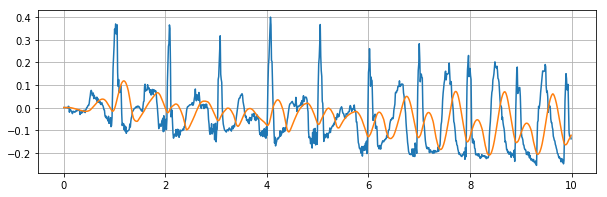

In [27]:
t = np.arange(0,10,0.01)
x = v_e[:,0]

fir = fir_filter(100,0.001,30)

plt.figure(figsize=(10,3))
plt.plot(t, x)
plt.plot(t,fir.ouput_filtered_x(x))

plt.grid()
plt.show()

Text(0.5,1,'Wyaw')

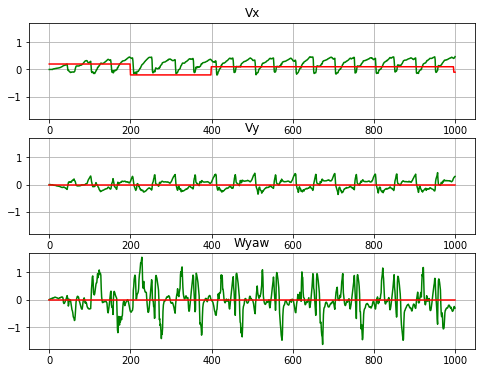

In [42]:

vx = rewards[:,1]
vy = rewards[:,2]

plt.figure(figsize=(8,6))

# plt.plot(v_e[:,0])
# plt.plot(v_e[:,1])
# plt.plot(v_e[:,-1])
# plt.plot(vx, 'r')
# plt.plot(vy, 'b')
max_step = 1000

ax1 = plt.subplot(311)
plt.plot(v_e[:,0], color='g', label='o_1')
plt.plot(commands[:max_step,0], color='r', label='o_1')
plt.grid()
plt.title('Vx')


ax2 = plt.subplot(312, sharex=ax1, sharey=ax1)
plt.plot(v_e[:,1], color='g', label='o_1')
plt.plot(commands[:max_step,1], color='r', label='o_1')

plt.grid()
plt.title('Vy')

ax2 = plt.subplot(313, sharex=ax1, sharey=ax1)
plt.plot(v_e[:,-1], color='g', label='o_1')
plt.plot(commands[:max_step,2], color='r', label='o_1')
plt.grid()
plt.title('Wyaw')

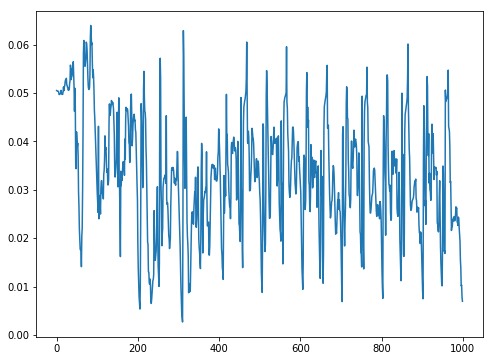

In [43]:
plt.figure(figsize=(8,6))
plt.plot(rewards[:,0])

Text(0.5,1,'Wyaw')

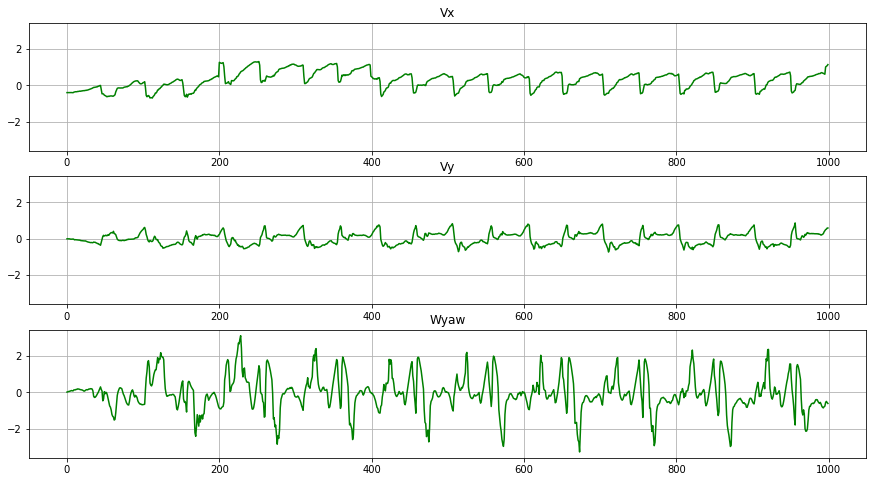

In [25]:
vx_e = v_e[:,0] - commands[:max_step,0]
vy_e = v_e[:,1] - commands[:max_step,1]
wyaw_e = v_e[:,-1] - commands[:max_step,2]

plt.figure(figsize=(15,8))
ax1 = plt.subplot(311)
plt.plot(vx_e*2, color='g', label='o_1')
#plt.plot(commands[:max_step,0], color='r', label='o_1')
plt.grid()
plt.title('Vx')


ax2 = plt.subplot(312, sharex=ax1, sharey=ax1)
plt.plot(vy_e*2, color='g', label='o_1')
#plt.plot(commands[:max_step,1], color='r', label='o_1')

plt.grid()
plt.title('Vy')

ax2 = plt.subplot(313, sharex=ax1, sharey=ax1)
plt.plot(wyaw_e*2, color='g', label='o_1')
#plt.plot(commands[:max_step,2], color='r', label='o_1')
plt.grid()
plt.title('Wyaw')


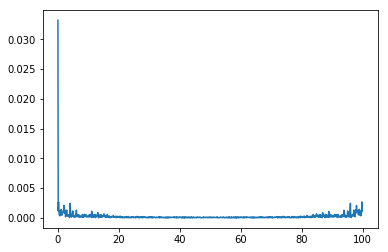

In [44]:



x = rewards[:,0]


Fs = 100.0;                 # sampling rate采样率
Ts = 1.0/Fs;                # sampling interval 采样区间
t = np.arange(0,1,Ts)       # time vector,这里Ts也是步长

 

n = x.shape[0]                 # length of the signal
k = np.arange(n)
T = n/Fs
frq = k/T                   # two sides frequency range
frq1 = frq[range(int(n/2))] # one side frequency range

YY = np.fft.fft(x)          # 未归一化
Y = np.fft.fft(x)/n         # fft computing and normalization 归一化
Y1 = Y[range(int(n/2))]

plt.figure()
plt.plot(frq, abs(Y))